In [1]:
%store -r import_all_libs

In [2]:
import_all_libs

In [3]:
import gc

In [4]:
dtype = {
    'user_id': 'int32',
    'event_info': 'object',
    'event_time': 'object',
    'event_type': 'object',
    'item_bought': 'int32',
}

In [5]:
data = pd.read_csv('/home/tuts/datasets/meli-challenge-2020/complete_data.csv', dtype=dtype)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999166 entries, 0 to 11999165
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int32 
 1   event_info   object
 2   event_time   object
 3   event_type   object
 4   item_bought  int32 
dtypes: int32(2), object(3)
memory usage: 366.2+ MB


In [7]:
user_1 = data[data.user_id == 1]

In [8]:
user_1.event_info

19                   643652
20    DESMAMADEIRA ELETRICA
21                  1156086
22    DESMAMADEIRA ELETRICA
23    DESMAMADEIRA ELETRICA
24                  1943604
25    DESMAMADEIRA ELETRICA
26                   206667
27    DESMAMADEIRA ELETRICA
28                  1282813
29                   228737
30                   228737
31                   228737
Name: event_info, dtype: object

In [9]:
data.event_info.nunique()

2449529

In [10]:
data.event_info.value_counts().describe()

count   2449529.00
mean          4.90
std          40.35
min           1.00
25%           1.00
50%           2.00
75%           4.00
max       20689.00
Name: event_info, dtype: float64

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


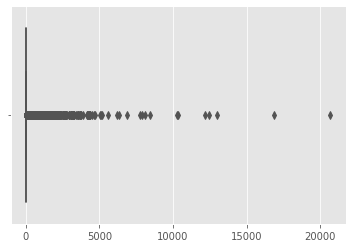

In [11]:
sns.boxplot(data.event_info.value_counts().values);

In [12]:
data.event_info.sort_values()[:-20]

7221161                                     \n\n
2984789                                         
2984790                                      ,  
2525248                                        o
2525228                                        o
                           ...                  
4159040                                ¡phone 7s
4159041                                ¡phone 7s
8747815         에뛰드하우스 CC 크림 35G SPF 30
234913      ​​​​​​​MARKETING PROFISSIONAIS BRUNO
3311268    • MOUSE WIRELESS WM126 PRETO DELL FIO
Name: event_info, Length: 11999146, dtype: object

In [13]:
data[data.item_bought == 1748830].event_info.nunique()

3162

In [14]:
data.user_id.value_counts()

131539    566
357550    480
101203    473
62689     471
306847    445
         ... 
95254       1
245011      1
148333      1
246621      1
52502       1
Name: user_id, Length: 413163, dtype: int64

In [15]:
data.user_id.value_counts().describe()

count   413163.00
mean        29.04
std         36.28
min          1.00
25%          5.00
50%         16.00
75%         39.00
max        566.00
Name: user_id, dtype: float64

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


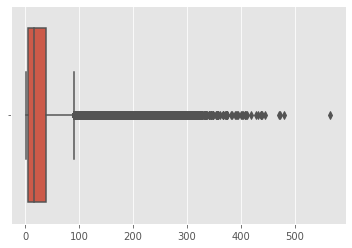

In [16]:
sns.boxplot(data.user_id.value_counts().values);

In [17]:
data = pd.concat([data, pd.get_dummies(data.event_type, drop_first=True)], axis=1)
data.drop('event_type', axis=1, inplace=True)
data.head()

,user_id,event_info,event_time,item_bought,view
0,0,1786148,2019-10-19T11:25:42.444-0400,1748830,1
1,0,1786148,2019-10-19T11:25:57.487-0400,1748830,1
2,0,RELOGIO SMARTWATCH,2019-10-19T11:26:07.063-0400,1748830,0
3,0,1615991,2019-10-19T11:27:26.879-0400,1748830,1
4,0,1615991,2019-10-19T11:28:36.558-0400,1748830,1


In [19]:
data['time'] = pd.to_datetime(data.event_time, infer_datetime_format=True)
data.drop('event_time', axis=1, inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999166 entries, 0 to 11999165
Data columns (total 5 columns):
 #   Column       Dtype                                 
---  ------       -----                                 
 0   user_id      int32                                 
 1   event_info   object                                
 2   item_bought  int32                                 
 3   view         uint8                                 
 4   time         datetime64[ns, pytz.FixedOffset(-240)]
dtypes: datetime64[ns, pytz.FixedOffset(-240)](1), int32(2), object(1), uint8(1)
memory usage: 286.1+ MB


In [21]:
users_counts = data.user_id.value_counts()

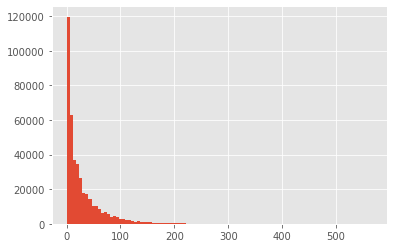

In [22]:
plt.hist(x=users_counts.values, bins=100);

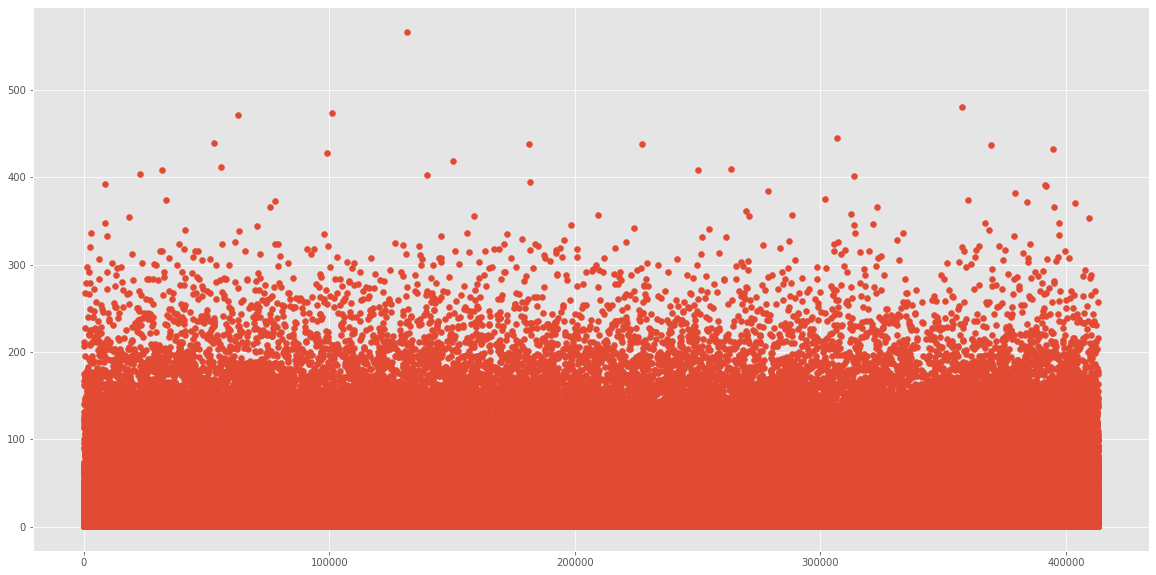

In [23]:
plt.figure(figsize=(20,10))
plt.scatter(users_counts.index, users_counts.values);

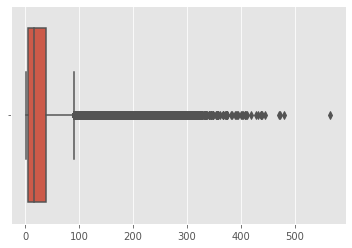

In [24]:
sns.boxplot(x=users_counts.values);

In [25]:
users_counts.describe()

count   413163.00
mean        29.04
std         36.28
min          1.00
25%          5.00
50%         16.00
75%         39.00
max        566.00
Name: user_id, dtype: float64

In [26]:
data.time

0          2019-10-19 11:25:42.444000-04:00
1          2019-10-19 11:25:57.487000-04:00
2          2019-10-19 11:26:07.063000-04:00
3          2019-10-19 11:27:26.879000-04:00
4          2019-10-19 11:28:36.558000-04:00
                         ...               
11999161   2019-10-04 08:34:56.361000-04:00
11999162   2019-10-07 10:49:32.217000-04:00
11999163   2019-10-07 10:52:21.825000-04:00
11999164   2019-10-07 10:53:07.399000-04:00
11999165   2019-10-07 10:55:32.393000-04:00
Name: time, Length: 11999166, dtype: datetime64[ns, pytz.FixedOffset(-240)]

In [27]:
data['year'] = pd.DatetimeIndex(data.time).year
data['month'] = pd.DatetimeIndex(data.time).month
data['day'] = pd.DatetimeIndex(data.time).day

In [28]:
data.head()

,user_id,event_info,item_bought,view,time,year,month,day
0,0,1786148,1748830,1,2019-10-19 11:25:42.444000-04:00,2019,10,19
1,0,1786148,1748830,1,2019-10-19 11:25:57.487000-04:00,2019,10,19
2,0,RELOGIO SMARTWATCH,1748830,0,2019-10-19 11:26:07.063000-04:00,2019,10,19
3,0,1615991,1748830,1,2019-10-19 11:27:26.879000-04:00,2019,10,19
4,0,1615991,1748830,1,2019-10-19 11:28:36.558000-04:00,2019,10,19


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999166 entries, 0 to 11999165
Data columns (total 8 columns):
 #   Column       Dtype                                 
---  ------       -----                                 
 0   user_id      int32                                 
 1   event_info   object                                
 2   item_bought  int32                                 
 3   view         uint8                                 
 4   time         datetime64[ns, pytz.FixedOffset(-240)]
 5   year         int64                                 
 6   month        int64                                 
 7   day          int64                                 
dtypes: datetime64[ns, pytz.FixedOffset(-240)](1), int32(2), int64(3), object(1), uint8(1)
memory usage: 560.7+ MB


In [31]:
data['year'] = data.year.astype(np.int16)
data['month'] = data.month.astype(np.int16)
data['day'] = data.day.astype(np.int16)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999166 entries, 0 to 11999165
Data columns (total 8 columns):
 #   Column       Dtype                                 
---  ------       -----                                 
 0   user_id      int32                                 
 1   event_info   object                                
 2   item_bought  int32                                 
 3   view         uint8                                 
 4   time         datetime64[ns, pytz.FixedOffset(-240)]
 5   year         int16                                 
 6   month        int16                                 
 7   day          int16                                 
dtypes: datetime64[ns, pytz.FixedOffset(-240)](1), int16(3), int32(2), object(1), uint8(1)
memory usage: 354.7+ MB


In [35]:
data.year.describe()

count   11999166.00
mean        2019.00
std            0.00
min         2019.00
25%         2019.00
50%         2019.00
75%         2019.00
max         2019.00
Name: year, dtype: float64

In [36]:
data.day.describe()

count   11999166.00
mean          14.73
std            9.40
min            1.00
25%            6.00
50%           14.00
75%           23.00
max           31.00
Name: day, dtype: float64

In [87]:
data.time.describe()

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


count                             11999166
unique                            11964607
top       2019-10-03 17:41:01.709000-04:00
freq                                     4
first     2019-09-24 07:41:04.596000-04:00
last      2019-10-31 20:19:14.525000-04:00
Name: time, dtype: object

In [83]:
gb = data[['year', 'month', 'day', 'item_bought']].groupby(['year', 'month', 'day'], as_index=False).count()
gb.head()

,year,month,day,item_bought
0,2019,9,24,21459
1,2019,9,25,99422
2,2019,9,26,195824
3,2019,9,27,250618
4,2019,9,28,294894


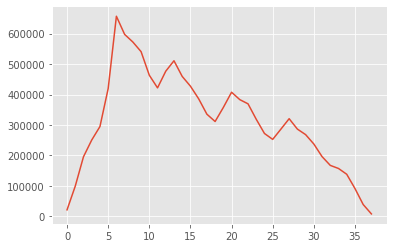

In [85]:
plt.plot(gb.index, gb.item_bought);

In [88]:
del gb
gc.collect()

1055911

In [ ]:
data.to_csv('/home/tuts/datasets/meli-challenge-2020/complete_data_with_time.csv', index=False)

In [90]:
del data
gc.collect()

49

In [37]:
data.head()

,user_id,event_info,item_bought,view,time,year,month,day
0,0,1786148,1748830,1,2019-10-19 11:25:42.444000-04:00,2019,10,19
1,0,1786148,1748830,1,2019-10-19 11:25:57.487000-04:00,2019,10,19
2,0,RELOGIO SMARTWATCH,1748830,0,2019-10-19 11:26:07.063000-04:00,2019,10,19
3,0,1615991,1748830,1,2019-10-19 11:27:26.879000-04:00,2019,10,19
4,0,1615991,1748830,1,2019-10-19 11:28:36.558000-04:00,2019,10,19
